In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge

In [3]:
from google.colab import files
import os

# Upload the file
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
  # Assuming the uploaded file is the one intended for df
  df = pd.read_csv(fn)
  print(f"DataFrame loaded from {fn}")
  break # Process only the first uploaded file, or modify to handle multiple

df.head()


Saving Concrete Compressive Strength.csv to Concrete Compressive Strength (4).csv
User uploaded file "Concrete Compressive Strength (4).csv" with length 49050 bytes
DataFrame loaded from Concrete Compressive Strength (4).csv


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.shape

(1030, 9)

In [5]:
df.columns = df.columns.str.strip()
X=df.drop('Concrete compressive strength',axis=1)
y=df['Concrete compressive strength']

In [19]:
pipeline=make_pipeline(StandardScaler(),PolynomialFeatures(degree=2, include_bias=False),
                       SGDRegressor(penalty='l2',learning_rate='adaptive', eta0=0.001,alpha=1.0, max_iter=5000,early_stopping=True,validation_fraction=0.1, tol=1e-3, random_state=42))

In [20]:
#testing our model using learning curve
train_sizes, train_scores, val_scores = learning_curve(pipeline, X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2'
)
train_mean=np.mean(train_scores,axis=1)
val_mean=np.mean(val_scores,axis=1)

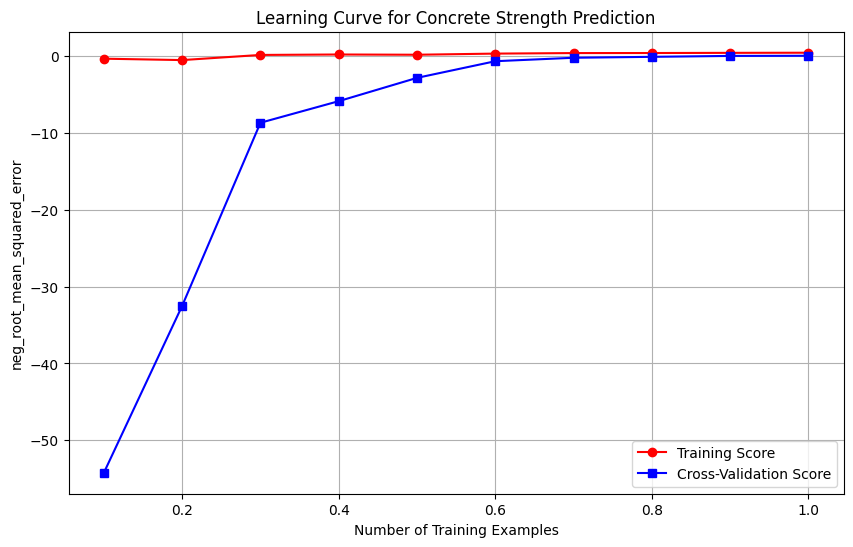

In [23]:

#visualize the result
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0.1, 1.0, 10), train_mean, label='Training Score', color='red', marker='o')
plt.plot(np.linspace(0.1, 1.0, 10), val_mean, label='Cross-Validation Score', color='blue', marker='s')

plt.title('Learning Curve for Concrete Strength Prediction')
plt.xlabel('Number of Training Examples')
plt.ylabel("neg_root_mean_squared_error")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 156.05815385087317
R-squared: 0.39437482584748695


In [ ]:
###n this project, a regularized linear regression model trained with stochastic gradient descent was used to predict concrete compressive strength.
#Feature scaling and L2 regularization were applied to stabilize training and reduce overfitting.
#Learning curve analysis showed that while the model initially struggled with small training sizes, performance improved steadily with more data and the gap between training and validation scores decreased.
###